# Homework Assignment #4 (Individual)
## Regression models

### <p style="text-align: right;"> &#9989; .</p>
### <p style="text-align: right;"> &#9989; Put your _GitHub username_ here.</p>

### Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Performing multiple regression using `statsmodels` and/or `sklearn`
* Understand the metric of a good fit
* Test/Train datasets

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, November 11.** It should be uploaded into the "Homework Assignments" submission folder for Homework #4.  Submission instructions can be found at the end of the notebook.


------
<a id="toc"></a>

## Table of contents

1. [Part 1: Git](#part1) (7 points)

2. [Part 2: Multiple Regression](#part3) (42 points)

3. [Part 3: Logistic Regression](#part4) (25 points)

4. [Part 4: Finishing](#conclusion) (3 points)

In [1]:
grades = [7, 42, 25, 3]

print(f"The total grade for this assignment is {sum(grades)}" )

The total grade for this assignment is 77


---
<a id="part1"></a>
[Back to ToC](#toc)

## Part 1: Git (7 points)

For this assignment, you're going to add it to the `cmse202-f22-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Question 1.1 (1 point)**: Navigate to your `cmse202-f22-turnin` **local** repository and create a new directory called `hw-04` and copy this notebook in that new directory.

``` bash
# mkdir 'hw-04'

```


&#9989; **Question 1.2 (2 points)**: Before you move on, create a new branch called `hw04_branch` and move into it. In the cell below put the command(s) to create a new branch and to checkout the new branch. (_Note_: your TA will be able to see if you have created the branch and its history).

``` bash
# bash-4.4$ git branch hw-04
  bash-4.4$ git checkout hw-04

```

&#9989; **Question 1.3 (3 points):**
Add your name and GitHub username to the top of the notebook, then add and commit **ONLY** the notebook.

``` bash
# # git add HW-04_Regression-STUDENT```

What is the commit message you used ?

``` bash
#git commit -m 'q1.3'
```

&#9989; **Question 1.4 (1 point):** Finally push the updated notebook to GitHub.

``` bash
# git push
```


**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f22-turnin`" repository inside the `hw-04` directory that you just created within the new branch `hw04-branch`.

In [3]:
# Run this cell before moving on
%pylab
%matplotlib inline
import pandas as pd
import seaborn as sns

sns.set_context("talk")

Using matplotlib backend: <object object at 0x7fa5a9c53ee0>
Populating the interactive namespace from numpy and matplotlib


---
<a id="part2"></a>
[Back to ToC](#toc)

## Part 2: Mulitple Regression (42 points)

In this part of the homework, you will work with data from the California Housing Prices dataset. Our goal is to use ordinary least squares to design a linear model to fit the median house value in a California census district given eight features. We will try both a linear model using all the provided features, as well as a reduced linear model which only uses a subset of the features. 

&#9989;  **Question 2.1 (1 points)**: **Do This:** Download the file `housing.csv` from the link below, and save it into the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the file.** If you did not use a command line tool to download the file, write down the command(s) that would have downloaded the file.

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/housing.csv`

``` bash
# curl -o 'housing.csv' https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/housing.csv

```

&#9989;  **Question 2.2 (2 points)**: **Do This:** To get started, read in the `housing.csv` dataset into a Pandas DataFrame, and then display some of its rows.

In [11]:
# Put your code here
import pandas as pd
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,avg_rooms,avg_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,6.984127,1.023810,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,6.238137,0.971880,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,8.288136,1.073446,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,5.817352,1.073059,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,6.281853,1.081081,565,259,3.8462,342200,NEAR BAY


&#9989;  **Question 2.3 (2 points)**: You should notice that the DataFrame has a non-numerical feature called "ocean_proximity". There are also a few rows with `NaN` values, although you may not see them in the few rows that were displayed. **Do This:** **Drop the "ocean_proximity" column from the dataframe, and drop all the rows with `NaN` values.** Note that we will not use the "ocean_proximity" column or any of the rows with `NaN` values in this assignment.

In [12]:
# Put your code here
df = df.drop(columns = ["ocean_proximity"],axis = 1)
df1 = df.dropna()
print(df.shape)
print(df1.shape)

(20640, 9)
(20433, 9)


&#9989;  **Question 2.4 (6 points)**: **Do This:** Using the `OLS()` method in `statsmodels.api`, make an ordinary least squares model that predicts "median_house_value" using the other features and display the `.summary()` of that process. **Be sure to use the `add_constant()` method to add a column of ones to the DataFrame before using the `OLS()` method so that your linear model includes a constant term.**

In [21]:
# Put your code here
import statsmodels.api as sm
q2_4 = df1.iloc[:,:-1]
q2_4 = sm.add_constant(q2_4)

clf = sm.OLS(df1['median_house_value'],q2_4).fit()
clf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     4514.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:50:29   Log-Likelihood:            -2.5677e+05
No. Observations:               20433   AIC:                         5.136e+05
Df Residuals:                   20424   BIC:                         5.136e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.558e+06   6.35e+04    -56.021      0.000   -3.68e+06   -3.43e+06
longitude          -4.223e+04    725.615    -58.205      0.000   -4.37e+04   -4.08e+04
latitude           -4.213e+04    692.323    -60.854      0.000   -4.35e+04   -4.08e+04
housing_median_age  1139.3771     43.181     26.386      0.000    1054.739    1224.015
avg_rooms          -6625.2745    573.271    -11.557      0.000   -7748.932   -5501.617
avg_bedrooms        4.571e+04   2737.024     16.699      0.000    4.03e+04    5.11e+04
population           -41.2977      1.036    -39.865      0.000     -43.328     -39.267
households           134.5370      3.087     43.583      0.000     128.486     140.588
median_income       4.156e+04    406.403    102.256      0.000    4.08e+04    4.24e+04
==============================================================================
Omnibus:                     4964.002   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20949.365
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       7.404   Cond. No.                     2.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&#9989;  **Question 2.5 (6 points)**: **Answer These Questions:** 
1. Based on the output of the OLS summary, does this linear model appear to be a good fit? 
2. Which of these features appear to be "significant" in predicting the "median_house_value"?

<font size=+3>&#9998;</font> Put your answers here:
1. based on the R-squared and the Adj. R-squared, we could say this linear model appear to be just fine fit
2. all features are significant since their p-values are extreme low

&#9989;  **Question 2.6 (4 points)**: A student from U of M managed to enroll in this class (don't ask us how) and is working on this homework. They got the following output when they used the `OLS()` method in `statsmodels.api`. 

<img src="https://i.ibb.co/pnvcKQ2/Perfect-Model.png" width="400px" border="0">

When you compare outputs, the Wolverine tells you "My linear model is better than yours because my linear model has a larger $R^2$-value than your model. I guess Wolverines are way better than Spartans at data science."

**Answer These Questions:** 
1. How did they get a linear model with a near perfect $R^2$-value? 
2. Is their model actually better than yours? 

Justify your answers.

<font size=+3>&#9998;</font> Put your answers here:
1.  beacuse they even didn't drop the median_house_value column, of course the 𝑅2 -value is near perfect
2. No, since the p-values are not that low, which means there are not too many features significant.

&#9989;  **Question 2.7 (2 points)**: **Answer This:** Use `plot_regress_exog` to examine the fits to the data, using `latitude` as the independent variable. Notice that the predicted data points don’t follow a linear trend (I.e., a straight line). Describe the trend you see. 

eval_env: 1


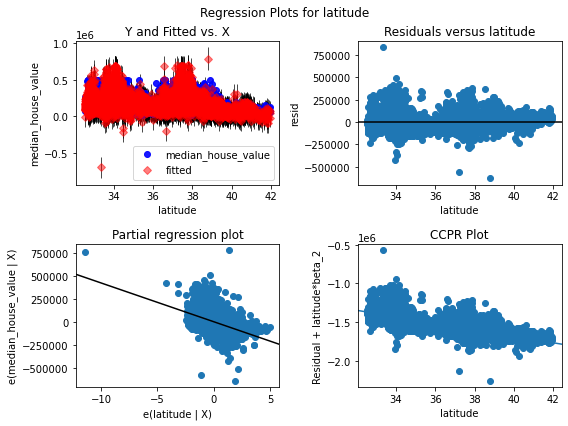

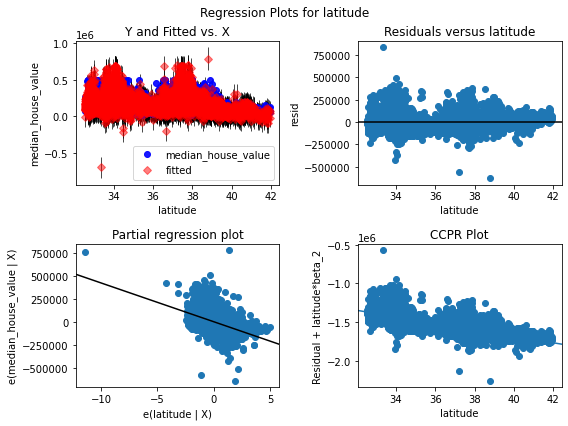

In [22]:
# Put your code here
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_regress_exog(clf, 'latitude', fig=fig)


<font size=+3>&#9998;</font> Put your answers here:the trend is fit the initial dataframe


&#9989;  **Question 2.8 (1 points)**: **Answer This:** Explain why the best fit values don’t follow a straight line. Is this a linear model (I.e., with depdence on `latitude`, but no dependence on `latitude`^2, `latitude`^3, etc.)? Be as detailed as possible. 

<font size=+3>&#9998;</font> Put your answers here:
A best-fit line estimates a straight line that minimizes the distance between itself and the location of observations in some data set. Best-fit lines are used to show trends or correlations between the dependent and independent variables. the OLS can't give us a non straight line.

&#9989;  **Question 2.9 (6 points)**: In the output of the OLS summary, you should have seen a note that says something like 

"The condition number is large, [[number]]. This might indicate that there are strong multicollinearity or other numerical problems." 

Multicollinearity is a statistical phenomenon where some of the features in a model can be linearly predicted using some of the other features in the model. In other words, the features in the model are somewhat redundant. Hence, even if each feature may be deemed significant, it may still be possible to form a "reduced" model using a smaller number of features. 

**Do This:** Design a second linear model that uses a subset of the eight features to predict the "median_house_value", and fits the data comparably well as the first linear model you designed in Question 3.4. You can choose this subset either by trial and error, or by any other method you'd like.

In [38]:
# Put your code here
dfr = q2_4[['const','housing_median_age','median_income']]
#since their mse are low
clf1 = sm.OLS(df1['median_house_value'], dfr).fit()
clf1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                 1.062e+04
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:27:07   Log-Likelihood:            -2.5989e+05
No. Observations:               20433   AIC:                         5.198e+05
Df Residuals:                   20430   BIC:                         5.198e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -1.04e+04   1923.650     -5.409      0.000   -1.42e+04   -6633.876
housing_median_age  1746.5451     45.232     38.613      0.000    1657.887    1835.203
median_income       4.321e+04    299.874    144.082      0.000    4.26e+04    4.38e+04
==============================================================================
Omnibus:                     4076.949   Durbin-Watson:                   0.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9674.652
Skew:                           1.122   Prob(JB):                         0.00
Kurtosis:                       5.516   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989;  **Question 2.10 (4 points)**: **Answer This:** How did your reduced linear model fit the data compared to the full linear model you created in Question 3.4? Give some quantitative justification for this answer.

<font size=+3>&#9998;</font> Put your answers here: the reduced model has a little small R-squre values, but it's still good enough,and the features of std err are lower.



&#9989;  **Question 2.11 (2 points)**: **Answer This:** Now that you have your reduced model, make a heat map showing the correlations between the different variables (similar to what we did on Day 14).

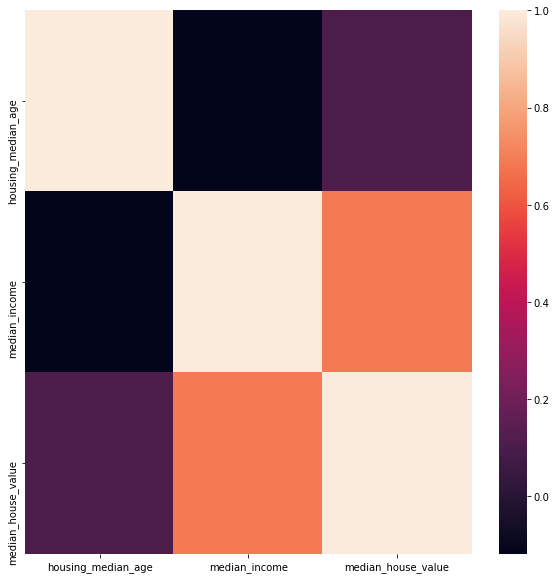

In [43]:
# Put your code here
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize = (10,10) )
corr = df1[['housing_median_age','median_income',"median_house_value"]].corr()
ax = sns.heatmap(corr)

&#9989;  **Question 2.12 (4 points)**: **Answer This:** You should find that there isn’t much overlap between the high-correlation variables in the heat map and the variables you used in your (reduced)  model, the opposite of what we found on Day 14. Explain why this is the case.

<font size=+3>&#9998;</font> Put your answers here:since in the reduced model we only have three features, muchh less than the one we had in Day14, and from the heat map, we can see that the diagonal of the heatmap show a strong correlation


---
### &#128721; STOP
**Pause to commit your changes to your Git repository! (2 points)**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete" 

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3. Logistic Regression (25 points)

In this part of the homework, you will work with data from an unknown source. Our goal is to use logistic regression to identify who is more likely to buy merchandise from ads on social networks.

&#9989;  **Question 3.1 (4 points)**: 

1. **Do This:** Download the dataset and write the command you used in the next cell

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_4/ads.csv`
    
2. **Do This:** Load the data in this file into a `Pandas` dataframe
3. **Do This:** Display the first **five** rows of the dataframe. 

In [45]:
# Put the command to download the data here 
!curl -o 'ads.csv' https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_4/ads.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10926  100 10926    0     0  57204      0 --:--:-- --:--:-- --:--:-- 57204


In [63]:
# Put your code for reading in the dataset here
ads = pd.read_csv("ads.csv")
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


As you can see the dataset has only few columns. The first columns is not useful since it is a unique identifier. The second column could be useful, however, we need numbers instead of strings. Hence we are left only with the last three columns. `Age` and `EstimatedSalary` will be our features while `Purchased` will be our labels 

&#9989;  **Question 3.2 (3 points)**: 

1. **Do This:** Drop the first and second columns of the dataset    
2. **Do This:** Divided the rest of the dataset into a train and a test dataset using `train_test_split` function of `scikit-learn`. The test dataset should be 25% of the original data


In [64]:
# Put your code here
from sklearn.model_selection import train_test_split
ads = ads.drop(['User ID'],axis = 1)
ads = ads.drop(['Gender'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(ads[['Age','EstimatedSalary']],ads[['Purchased']], test_size=0.25, random_state=42)

&#9989;  **Question 3.3 (4 points)**: 

1. **Do This:** Use the `Logit` class to perform Logistic regression on your training dataset (don't forget to add the constant).
2. **Do This:** Print the results of your model


In [69]:
# Put your code here
X_traincon = sm.add_constant(X_train)
log_reg = sm.Logit(y_train, X_traincon).fit()

Optimization terminated successfully.
         Current function value: 0.374943
         Iterations 7


In [70]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Fri, 11 Nov 2022   Pseudo R-squ.:                  0.4227
Time:                        21:57:15   Log-Likelihood:                -112.48
converged:                       True   LL-Null:                       -194.85
Covariance Type:            nonrobust   LLR p-value:                 1.699e-36
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -11.1261      1.313     -8.475      0.000     -13.699      -8.553
Age                 0.2036      0.026      7.754      0.000       0.152       0.255
EstimatedSalary  3.386e-05   5.78e-06      5.856      0.000    2.25e-05    4.52e-05
===================================================================================
"""

&#9989;  **Question 3.4 (2 points)**: Do you think this is a good fit? Explain your answer


     the  Pseudo R-squ.:	0.4227 which is under 0.5, that means is not a good fit

&#9989;  **Question 3.5 (4 points)**: Use the above model to make predictions on the test dataset. Remember that the `Logit` model returns continuous values from 0 to 1 while you need two discrete values. Then use the function `accuracy_score` from `scikit-learn` to see how good your model is.

In [91]:
yhat = log_reg.predict(sm.add_constant(ads[['Age','EstimatedSalary']]))
yhato = []
for i in yhat:
    if i > 0.5:
        i = 1
        yhato.append(i)
    else:
        i = 0
        yhato.append(i)
print(accuracy_score(ads['Purchased'],yhato))

0.845


In [74]:
# Put your code here
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression()
clf.fit(ads[['Age','EstimatedSalary']],ads[['Purchased']])
print(clf.coef_, clf.intercept_)
yu = clf.predict(ads[['Age','EstimatedSalary']])
accuracy_score(ads[['Purchased']], yu)

[[-2.10415172e-09 -2.69301403e-06]] [-2.24944689e-10]


/home/wanghaiz/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6425

&#9989;  **Question 3.6 (1 point)**: Does the accuracy score change your opinion of the goodness of your model?


    yeah, the accuracy is not bad

&#9989;  **Question 3.7 (5 points)**: Does your model improve if you re-introduce the `Gender` column? Since the column is made of strings, replace `Male` with 0 and `Female` with 1. Is `Gender` an informative feature?
Explain your answers

In [104]:
# Put your code here
aa = pd.read_csv("ads.csv")
aa.Gender = aa.Gender.map({'Male':0, 'Female':1})
aa = aa.drop(['User ID'],axis = 1)
aanop = aa.iloc[:,:3]
X_train1, X_test1, y_train1, y_test1 = train_test_split(aanop,aa[['Purchased']], test_size=0.25, random_state=42)
X_traincon1 = sm.add_constant(X_train1)
log_reg1 = sm.Logit(y_train1, X_traincon1).fit()
log_reg1.summary()

Optimization terminated successfully.
         Current function value: 0.374322
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            3
Date:                Fri, 11 Nov 2022   Pseudo R-squ.:                  0.4237
Time:                        22:26:03   Log-Likelihood:                -112.30
converged:                       True   LL-Null:                       -194.85
Covariance Type:            nonrobust   LLR p-value:                 1.455e-35
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -11.1169      1.318     -8.435      0.000     -13.700      -8.534
Gender             -0.2050      0.337     -0.609      0.542      -0.865       0.455
Age                 0.2055      0.027      7.716      0.000       0.153       0.258
EstimatedSalary   3.41e-05    5.8e-06      5.882      0.000    2.27e-05    4.55e-05
===================================================================================
"""

In [106]:
yhat1 = log_reg1.predict(sm.add_constant(aanop))
yhato1 = []
for i in yhat1:
    if i > 0.5:
        i = 1
        yhato1.append(i)
    else:
        i = 0
        yhato1.append(i)
print(accuracy_score(aa['Purchased'],yhato1))

0.8425


compare the the previous model, the accuracy slightly decrease, so the gender is not that useful.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository! (2 points)**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete" 

---

## Part 4. Finishing up (3 points)


It is now time to merge your changes to the main branch and push

&#9989; **Question 4.1 (1 point):** Switch to your main branch

```bash
# Put the command(s) to switch to your main branch
```

&#9989; **Question 4.2 (1 point):** Merge your `hw04-branch`

```bash
# Put the command(s) to merge your branch
```

&#9989; **Question 4.3 (1 point):** Finally push the changes to GitHub

```bash
# Put the command(s) to push your new main branch
```

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/TMrrP0WnVM" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #4, and upload it there.

&#169; Copyright 2022,  Department of Computational Mathematics, Science and Engineering at Michigan State University